In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


## Trabalho Final


  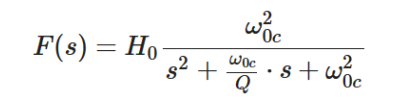



#### Dados os parâmetros:
- Ganho nas baixas frequências (ganho DC) \( H_0 = 1 \)
- Frequência de corte \( f_{0c} = 0.04 \) Hz
- Fator de qualidade \( Q = 1 \)

#### 2.1 – Tarefa 1 – Discretização do Filtro

Neste trabalho, deve-se utilizar a Transformação Tustin. Discretizar a função de transferência encontrada no passo anterior para implementá-la em no microcontrolador. Mostre o resultado obtido.


Função de transferência por aproximação de Tustin

In [2]:



T = 1/100 # Periodo de amostragem

fc = 0.04
wc = 2 * np.pi * fc
q = 1.0   
Ho = 1.0


z = sp.symbols('z')
s = 2/T * (z-1)/(z+1)
F = Ho * (wc**2 / (s**2 + wc/q * s + wc**2))


F_simplificada = sp.simplify(F)
print("F(Z) = \n")
sp.pprint(F_simplificada)



F(Z) = 

                    2                                           
0.0631654681669719⋅z  + 0.126330936333944⋅z + 0.0631654681669719
────────────────────────────────────────────────────────────────
                    2                                           
  40050.3286479256⋅z  - 79999.8736690637⋅z + 39949.7976830107   


#### 2.2 – Tarefa 2 – Encontrar a equação de diferenças pela transformada inversa.

Pela transformada inversa, método da equação de diferença, encontrar a equação de diferenças para implementação no microcontrolador.

Mostre o resultado obtido.


In [3]:
# Separar o numerador e denominador
num, den = sp.fraction(F_simplificada)

# Coeficientes do numerador e denominador
num_coef = sp.Poly(num, z).all_coeffs()
den_coef = sp.Poly(den, z).all_coeffs()

# Formar a equação de diferenças
y = sp.Function('y')
x = sp.Function('x')
n = sp.symbols('n', integer=True)

y_dif = sum(den_coef[i] * y(n-i) for i in range(len(den_coef)))


x_dif = sum(num_coef[i] * x(n-i) for i in range(len(num_coef)))

# Equação de diferenças
eq_diferencas = sp.Eq(y_dif, x_dif)
# Isolar y[n]
y_isolado = sp.solve(eq_diferencas, y(n))[0]

# Imprimir a equação de diferenças isolada
print("y(n) = ", end='')
sp.pprint(str(y_isolado).replace('⋅', '*').replace('(', '[').replace(')', ']'))

y(n) = 1.57715230559646e-6*x[n] + 1.57715230559646e-6*x[n - 2] + 3.15430461119293e-6*
x[n - 1] - 0.997489884145555*y[n - 2] + 1.99748357553633*y[n - 1]


#### 2.3 – Tarefa 3 – Implementação de Código para Teste do Sistema (simulação)

Implemente um algoritmo para teste da equação obtida para implementação no microcontrolador. (Python, MATLAB, etc).

O sinal de interesse é uma cossenoide com frequência de \( f = 0.04 \) Hz.

O sinal de interesse está com um ruído de frequência \( f = 0.8 \) Hz e com 10% da amplitude do sinal.

Mostre o resultado obtido.


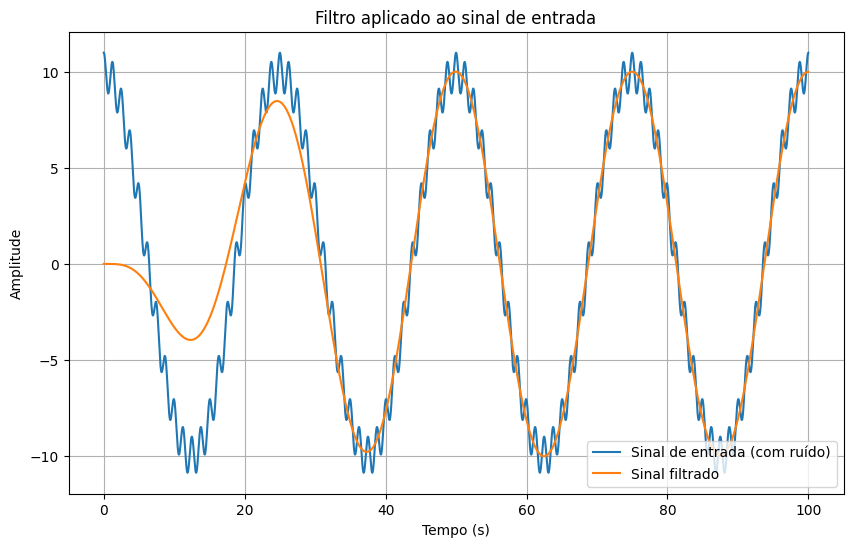

In [4]:


# Parâmetros

Tempo = 100    # Tempo total (s)
f_sinal = 0.04  # Frequência do sinal de interesse (Hz)
f_ruido = 0.8    # Frequência do ruído (Hz)
amp_sinal = 10
amp_ruido = 1  # Amplitude do ruído em relação ao sinal
# Tempo
t = np.arange(0, Tempo, T)


# Sinal de interesse (cossenoide)
sinal = amp_sinal*np.cos(2 * np.pi * f_sinal * t)

# Ruído
ruido = amp_ruido * np.cos(2 * np.pi * f_ruido * t)

# Sinal total (sinal de interesse + ruído)
x = sinal + ruido 

# Função filtro
def filtro(x):
    y = np.zeros_like(x)
    for n in range(2, len(x)):
        y[n] = 1.57715230559646e-6*x[n] + 1.57715230559646e-6*x[n - 2] + 3.15430461119293e-6*x[n - 1] - 0.997489884145555*y[n - 2] + 1.99748357553633*y[n - 1]
    return y

# Aplicando o filtro ao sinal
y = filtro(x)
y = filtro(y)
y *= -1

plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Sinal de entrada (com ruído)')
plt.plot(t, y, label='Sinal filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Filtro aplicado ao sinal de entrada')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
